In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def f(x,y):
    return x + 2*y


def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.


N = 10
t = np.linspace(0,1,N)
h = t[1] - t[0]
yext = Solucion(t)
#plt.scatter(t,yext)
#plt.xlabel('x')
#plt.ylabel('y')

In [3]:
def GetEuler(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        y[i] = y[i-1] + h*k1

In [4]:
def GetEuler2(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+h,y[i-1] + h*k1)
        
        y[i] = y[i-1] + 0.5*h*(k1+k2)

In [5]:
def GetEuler3(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + h/2, y[i-1] + h*k1/2)
        k3 = f(x[i-1] + h, y[i-1] - h*k1 + 2*h*k2)
        
        y[i] = y[i-1] + h*(k1 + 4*k2 + k3)/6

In [6]:
def GetEuler4(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1], y[i-1])
        k2 = f(x[i-1] + h/2, y[i-1] + h*k1/2)
        k3 = f(x[i-1] + h/2, y[i-1] + h*k2/2)
        k4 = f(x[i-1] + h, y[i-1] + h*k3)
        
        y[i] = y[i-1] + h*(k1 + 2*k2 + 2*k3 + k4)/6

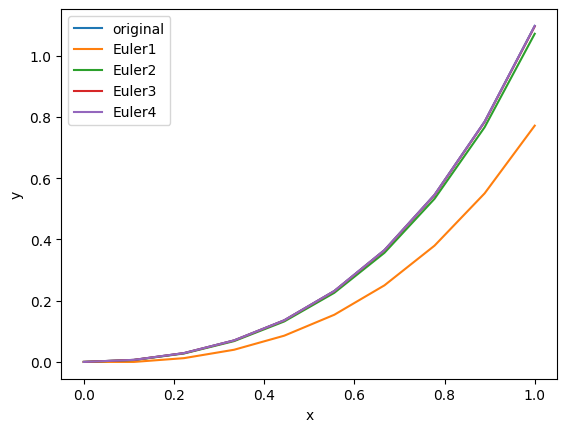

In [7]:
y1 = np.zeros_like(t)
y2 = np.zeros_like(t)
y3 = np.zeros_like(t)
y4 = np.zeros_like(t)

y1[0] = 0.
y2[0] = 0.
y3[0] = 0.
y4[0] = 0.

GetEuler(t,y1,h)
GetEuler2(t,y2,h)
GetEuler3(t,y3,h)
GetEuler4(t,y4,h)

plt.plot(t,yext,label='original' )
plt.plot(t,y1,label='Euler1')
plt.plot(t,y2,label='Euler2')
plt.plot(t,y3,label='Euler3')
plt.plot(t,y4,label='Euler4')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()

Se puede observar que a medida que el orden aumenta las curvas se aproximan más y mas a la curva original, llegando al punto de no poder observar a simple vista la diferencia entre los métodos 3 y 4. Para esto grafiquemos la diferencia entre la curva original y los valores obtenidos a distinto orden.

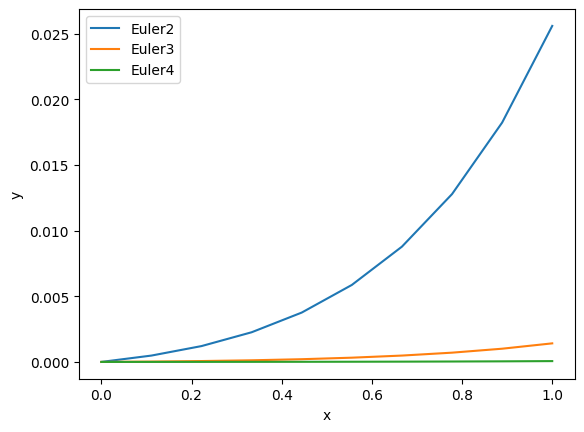

In [8]:
# plt.plot(t,np.abs(yext-y1),label='Euler1')
plt.plot(t,np.abs(yext-y2),label='Euler2')
plt.plot(t,np.abs(yext-y3),label='Euler3')
plt.plot(t,np.abs(yext-y4),label='Euler4')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()

Donde claramente observamos que la diferencia del va acercandose a cero a medida que el orden incrementa. No se grafíca el método de primer orden ya que al ser una diferencia significativa no permite apreciar la disminución de los ordenes mayores.

Ahora, para medir la estabilidad:

In [9]:
def fc(z):
    return 1j*z

In [10]:
def ComplexEuler():
    global theta
    global h_
    global f_
    
    theta += h_
    f_ += h_*fc(f_)
    
N = 100
Vueltas = 1
h_ = Vueltas * 2*np.pi/N
theta = 0.
f_ = 1

Solucion1 = np.array([theta,f_])


for i in range(N):
    ComplexEuler()
    Solucion1 = np.vstack([Solucion1, np.array([theta,f_])])

In [11]:
def ComplexEuler2():
    global theta
    global h_
    global f_
    
    theta += h_
    
    k1 = fc(f_)
    k2 = fc(f_+h_*k1)
    
    f_ += 0.5*h_*(k1+k2)

N = 30
Vueltas = 1
h_ = Vueltas * 2*np.pi/N
theta = 0.
f_ = 1

Solucion2 = np.array([theta,f_])

for i in range(N):
    ComplexEuler2()
    Solucion2 = np.vstack([Solucion2, np.array([theta,f_])])

In [12]:
def ComplexEuler3():
    global theta
    global h_
    global f_
    
    theta += h_
    
    k1 = fc(f_)
    k2 = fc(f_+h_*k1/2)
    k3 = fc(f_-h_*k1+2*h_*k2)
    
    f_ += h_*(k1 + 4*k2 + k3)/6

N = 16
Vueltas = 1
h_ = Vueltas * 2*np.pi/N
theta = 0.
f_ = 1

Solucion3 = np.array([theta,f_])

for i in range(N):
    ComplexEuler3()
    Solucion3 = np.vstack([Solucion3, np.array([theta,f_])])

In [13]:
def ComplexEuler4():
    global theta
    global h_
    global f_
    
    theta += h_
    
    k1 = fc(f_)
    k2 = fc(f_+h_*k1/2)
    k3 = fc(f_+h_*k2/2)
    k4 = fc(f_+h_*k3)
    
    f_ += h_*(k1 + 2*k2 + 2*k3 + k4)/6
    
N = 8
Vueltas = 1
h_ = Vueltas * 2*np.pi/N
theta = 0.
f_ = 1

Solucion4 = np.array([theta,f_])

for i in range(N):
    ComplexEuler4()
    Solucion4 = np.vstack([Solucion4, np.array([theta,f_])])

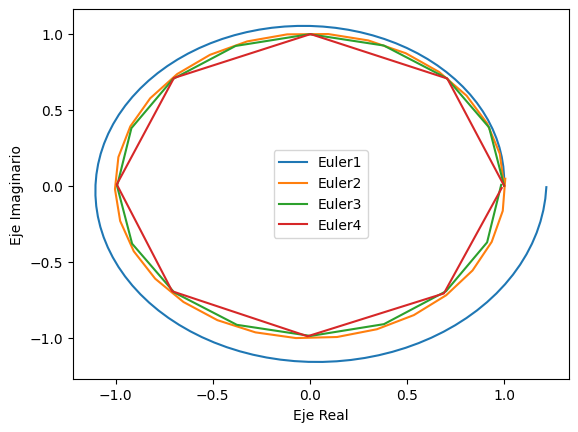

In [14]:
Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

Re2 = np.real(Solucion2[:,1])
Im2 = np.imag(Solucion2[:,1])

Re3 = np.real(Solucion3[:,1])
Im3 = np.imag(Solucion3[:,1])

Re4 = np.real(Solucion4[:,1])
Im4 = np.imag(Solucion4[:,1])


plt.plot(Re,Im,label='Euler1')
plt.plot(Re2,Im2,label='Euler2')
plt.plot(Re3,Im3,label='Euler3')
plt.plot(Re4,Im4,label='Euler4')

plt.xlabel('Eje Real')
plt.ylabel('Eje Imaginario')

plt.legend()

A medida que aumenta N, la estabilidad aumenta, y si el circulo se cierra, significa que es estable. Por lo tanto, cuanto menor sea el valor de N necesario para cerrar el ciclo, más estable será. Es por esto, que vemos que el método de orden 4 es mucho más estable pues, con pocos pasos en comparación a los otros métodos, el circulo se cierra.